# Exploratory Data Analysis 

 * The initial analysis of data supplied or extracted, to understand the trends, underlying limitations, quality, patterns, and relationships between various entities within the data set, using descriptive statistics and visualization tools is called Exploratory Data Analysis (EDA). 

 * EDA will give you a fair idea of what model better fits the data and whether any data cleansing and massaging might be required before taking the data through advanced modelling techniques or even put through Machine Learning and Artificial Intelligence algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Descriptive statistic parameters for the dataset

In [8]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


#### Check Missing Value

*In case there are any missing entries, we will impute them with appropriate values (mode in case of categorical feature, and median or mean in case of numerical feature)*

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Graphical Representation

* Univariate Analysis

<u>DataFrame.plot():</u>
Make plots of Series or DataFrame.

Uses the backend specified by the option plotting.backend. By default, matplotlib is used

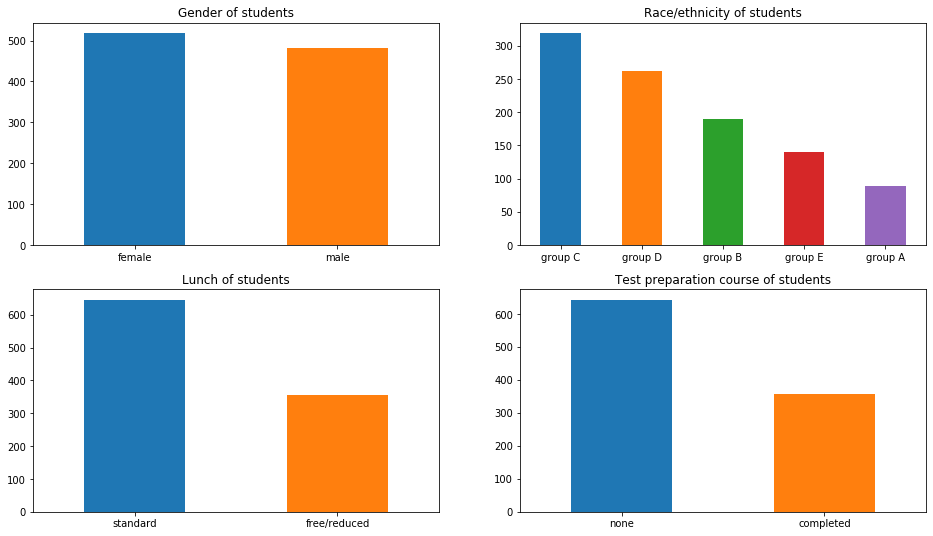

In [10]:
plt.subplot(221)
df['gender'].value_counts().plot(kind='bar', title='Gender of students', figsize=(16,9))
plt.xticks(rotation=0)
plt.subplot(222)
df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/ethnicity of students')
plt.xticks(rotation=0)
plt.subplot(223)
df['lunch'].value_counts().plot(kind='bar', title='Lunch of students')
plt.xticks(rotation=0)
plt.subplot(224)
df['test preparation course'].value_counts().plot(kind='bar', title='Test preparation course of students')
plt.xticks(rotation=0)
plt.show()


*A boxplot helps us in visualizing the data in terms of quartiles. It also identifies outliers in the dataset, if any*

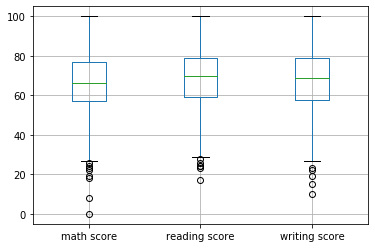

In [11]:
df.boxplot()

*The middle portion represents the inter-quartile range (IQR). The horizontal green line in the middle represents the median of the data. The hollow circles near the tails represent outliers in the dataset.*

#### Distribution Plot

D:\program\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


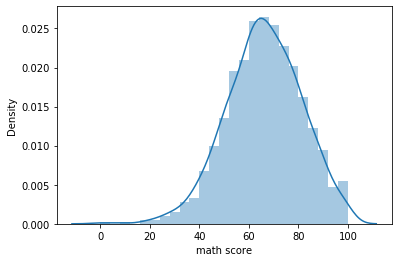

In [12]:
sns.distplot(df['math score'])

#### correlation between the 3 scores

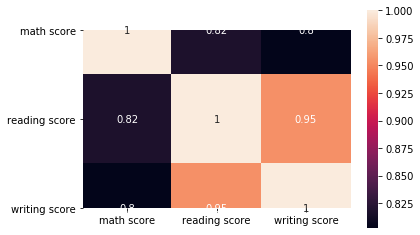

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()


* Bivariate Analysis

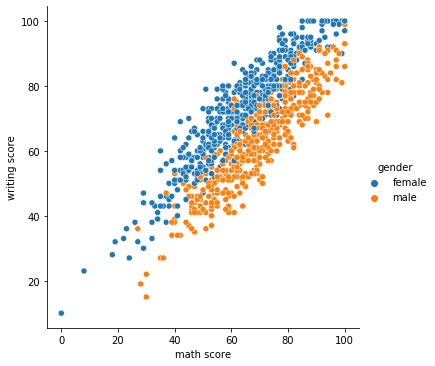

In [14]:
sns.relplot(data=df, x='math score',  y='writing score', hue='gender')

In [15]:
a = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().T
a

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math score,67.882883,69.389831,62.137755,69.745763,67.128319,63.497207
reading score,70.927928,73.000000,64.704082,75.372881,69.460177,66.938547
writing score,69.896396,73.381356,62.448980,75.677966,68.840708,64.888268


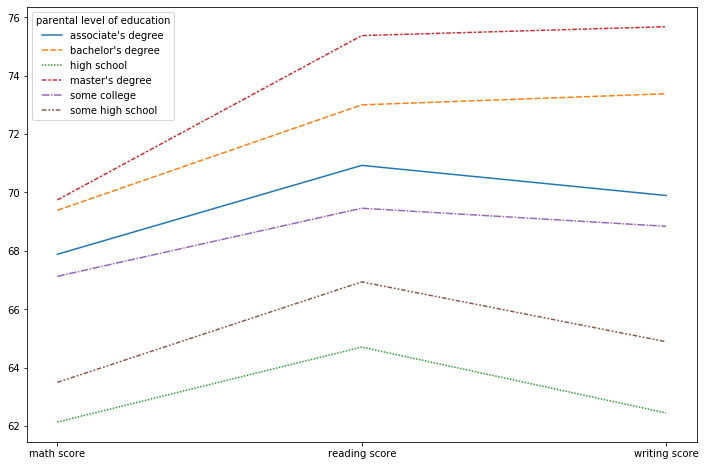

In [16]:
plt.subplots(figsize=(12,8))
sns.lineplot(data=a)


**Horizontal Bar Chart**

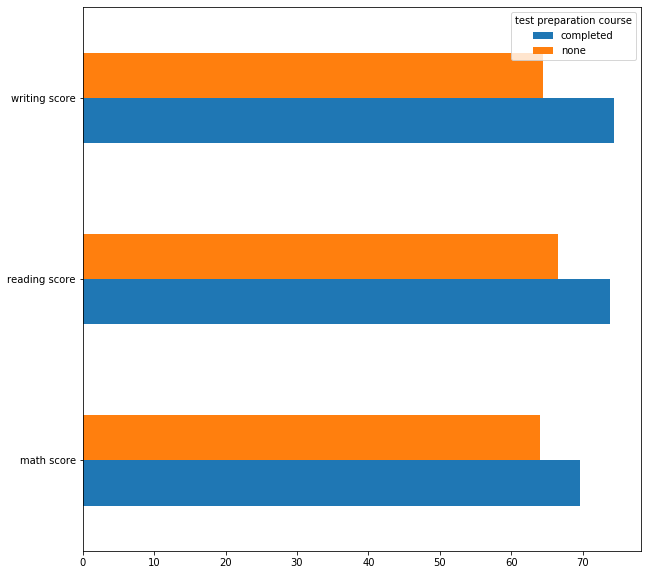

In [17]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(kind='barh', figsize=(10,10))

 Conclusions:
1. The gender distribution of students is fairly close.
2. Group C is the most prevelant ethnicity among students.
3. Students having standard lunch is almost twice of that of free/reduced lunch.
4. Students taking test preparation course is half of students not taking any preparation courses.
5. The distribution plot of math score resemble a bell curve. (Natural for students scoring mark in a test)
6. For same math score "female" students are scoring higher writing score whereas for same writing score "male" students are scoring higher math score.
7. As we can see from line plot, parents having higher education leads to students scoring better marks across all subjects.
8. From the bar chart, we can verify that students taking test preperation course have performed well in test as compared to those not taking any course.

Hypothesis:
1. From conclusion 7, we can hypothesize that parents having higher education have well study environment at home and/or they guide their children in their studies.
2. From conclusion 8, we can hypothesize that students taking test preperation course leads to more confidence and practice which helps in their tests.